### Import the desired APIs

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Decalre a tensorflow constant and variable

In [2]:
#import tensorflow as tf
import tensorflow as tf
# Declare a constant, we need to import constant from tensorflow
sample_constant=tf.constant(20)
print(sample_constant.dtype)
# Now we can perform some operations using tensorlfow in this constant
#Similarly, we can create variables also
A1=tf.Variable([1,2,3,4])
print(A1)
#Above created variable can be printed using the numpy conversion
print(A1.numpy())
B1=A1.numpy()

B1=tf.Variable(B1)
print(B1)

<dtype: 'int32'>
<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>
[1 2 3 4]
<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4])>


### Operations on Tensor Constants and Variables

In [8]:
#Ones function
A1=tf.ones([3,2], tf.int32)
#print(A1.numpy())

#Zeros function
B1=tf.zeros([3,2], tf.int32)
#print(B1)

A1=tf.constant([1,2,3,4])
A23=tf.constant([[1,2,3], [4,5,6]])

#create ones tensor and perform element wise multiplication
B1=tf.ones_like(A1)
B23=tf.ones_like(A23)
C1=tf.multiply(A1,B1)
C23=tf.multiply(A23, B23)
print(C1.numpy())
#fill method
c33=tf.fill([3,3], 7)
#print(c33.numpy())

InvalidArgumentError: Incompatible shapes: [4] vs. [3,2] [Op:Mul]

In [4]:
#create two tensors
a1=tf.fill([3,3], 7)
a2=tf.fill([3,3], 3)
#Add the two tensors
a3=tf.add(a1,a2)
#print final tensor
print(a3.numpy())

[[10 10 10]
 [10 10 10]
 [10 10 10]]


In [11]:
# Matrix multiplication
#create feature value
feat_value=tf.constant([[1,12],[2,13],[3,14]])
parameters=tf.constant([[100],[200]])
print(parameters)

#create predictions by matrix multiplication
pred=tf.matmul(feat_value, parameters)
#print(pred)

# if we define actual value, we can have errors
actual=[[110], [120],[130]]
error=actual-pred
#print(error)

tf.Tensor(
[[100]
 [200]], shape=(2, 1), dtype=int32)


### Reduce functions

In [17]:
#we can reduce the value of tensor
feat_value=tf.constant([[1,12],[2,13],[3,14]])
pred=tf.reduce_sum(feat_value)
print(pred)

#we can reduce at any dimension also
print(tf.reduce_sum(feat_value, 1))

print(tf.reduce_all(feat_value))

tf.Tensor(45, shape=(), dtype=int32)
tf.Tensor([13 15 17], shape=(3,), dtype=int32)


InvalidArgumentError: cannot compute All as input #0(zero-based) was expected to be a bool tensor but is a int32 tensor [Op:All]

In [19]:
# Define x
x = tf.Variable(6.0)

# Define y within instance of GradientTape
with tf.GradientTape() as gt:
  gt.watch(x)
  y = tf.multiply(x, x)
  
#Evaluate the gradient of y at x = 6
g = gt.gradient(y, x)
print(g.numpy())

12.0


### reshape in tensorflow

In [7]:
#we need to reshape a picture so that it can be feed to neural network
#lets say we have a 28*28 grayscale image
image=tf.random.uniform([28,28], maxval=255, dtype='int32')
image_reshape=tf.reshape(image, [28*28,1])
#this is required when we input an image to the neural network

### Random numbers

### Losses in Tensorflow

In [8]:
# Three losses most commonly used
#Mean Absolute Error
#tf.keras.losses.mae()
#Mean squared error
#tf.keras.losses.mse()
#Huber Error
#tf.keras.losses.huber()

### Create a linear regression model

In [3]:
#import the dataset
mpg=pd.read_csv('auto-mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
mpg.horsepower=mpg.horsepower.str.replace("?", "100")

In [12]:
mpg.horsepower=pd.to_numeric(mpg.horsepower)

In [9]:
#import the dataset
housing=pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
#extract mpg and horsepower from the dataset
mpg_1=np.array(mpg['mpg'], np.float32)
horsepower=np.array(mpg['horsepower'], np.float32)

#define the intercept and slope
intercept=tf.Variable(0.1, np.float32)
slope=tf.Variable(0.1, np.float32)

In [10]:
#Extract price and sqft for the dataset
price=np.array(housing['price'], np.float32)
size=np.array(housing['sqft_living'], np.float32)

#Lets define the intercept and slope of the linear regression
intercept=tf.Variable(0.1, np.float32)
slope=tf.Variable(0.1, np.float32)

In [24]:
#create a linear regression using y=mx+b
def linear_regression(intercept, slope, features=horsepower):
    return slope*features+intercept

#create a loss function
def loss_function(intercept, slope, target=mpg_1, features=horsepower):
    #create predictions
    pred=linear_regression(intercept, slope, features)
    loss= tf.keras.losses.mse(target, pred)
    return loss

#create an instance of optimizer
opt=tf.keras.optimizers.Adam()
#minimize the loss using epochs
epochs=1000
for i in range(epochs):
    opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])
    print(np.array(loss_function(intercept, slope)))

287.8667
285.9213
284.0021
282.1096
280.24414
278.40613
276.59586
274.81375
273.06
271.33502
269.63895
267.97205
266.3346
264.72668
263.14847
261.60013
260.08163
258.5932
257.13477
255.7064
254.30804
252.93967
251.60121
250.29256
249.0136
247.76425
246.54422
245.35344
244.19164
243.05864
241.95409
240.87787
239.82957
238.80894
237.81563
236.84937
235.90974
234.99643
234.10904
233.24725
232.41058
231.59866
230.81107
230.04742
229.30728
228.59026
227.89581
227.22356
226.57307
225.94394
225.3356
224.74773
224.17981
223.63136
223.10196
222.59116
222.09856
221.62363
221.166
220.72514
220.30064
219.89212
219.49904
219.12111
218.75777
218.40869
218.07338
217.75146
217.44258
217.14624
216.86212
216.5898
216.3289
216.07909
215.83994
215.61111
215.39227
215.18309
214.98314
214.79214
214.60977
214.43573
214.26965
214.1113
213.96034
213.8165
213.67946
213.54898
213.4248
213.30666
213.19426
213.0874
212.98589
212.88943
212.79779
212.71086
212.62828
212.54996
212.47565
212.4052
212.33841
212.2751
21

### Lets create mini batch for the data

In [12]:
#Lets define the intercept and slope of the linear regression
intercept=tf.Variable(0.1, np.float32)
slope=tf.Variable(0.1, np.float32)
#create a linear regression using y=mx+b
def linear_regression(intercept, slope, features=size):
    return slope*features+intercept

#create a loss function
def loss_function(intercept, slope, target=price, features=size):
    #create predictions
    pred=linear_regression(intercept, slope, features)
    loss= tf.keras.losses.mse(target, pred)
    return loss

#create an instance of optimizer
opt=tf.keras.optimizers.Adam()

#create minibatch from the csv file

for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    price_batch=np.array(batch['price'], np.float32)
    size_batch=np.array(batch['sqft_living'], np.float32)
    opt.minimize(lambda:loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

print(intercept.numpy(), slope.numpy())


0.31799173 0.31615734


### Dense Layers (Multiple Layer NN)
#### Lets Create a simple dense neural network using keras API's

In [20]:
#Take UCI credit card details
credit_data=pd.read_csv('uci_credit_card.csv')
input=credit_data.drop(['ID','default.payment.next.month'], axis=1)
output=credit_data['default.payment.next.month']

In [22]:
print(input.shape)

(30000, 23)


In [25]:
#change input as tensorflow constant
input_net=tf.constant(input, tf.float32)
output_net=tf.constant(output, tf.float32)

In [31]:
#now define the weights using the normal distribution
# Define the layer 1 weights (keep in mind the number of neurons)
w1 = tf.Variable(tf.random.normal([23, 10]))
# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([10]))
# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([10,1]))
# Define the layer 2 bias
b2 = tf.Variable(0.0)

In [41]:
# Define the model
def model(w1, b1, w2, b2, features = input_net):
	# Apply relu activation functions to layer 1
	layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    # Apply dropout rate of 0.25
	dropout = tf.keras.layers.Dropout(0.25)(layer1)
	return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = input_net, targets = output_net):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return tf.keras.losses.binary_crossentropy(targets, predictions)

# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), var_list=[w1,b1,w2,b2])


In [45]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [62]:
#create s sequential model
model=keras.Sequential()
#add first layer
model.add(Dense(10,activation='relu', input_shape=(23,)))
#add the output layer
model.add(Dense(1, activation='sigmoid'))
#compile the model with optimizer and loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#fit the model and check the accuracy
history=model.fit(input_net, output_net, batch_size=100, epochs=10, validation_split=0.20)

Epoch 1/10
240/240 [==============================] - 2s 6ms/step - loss: 20501.6074 - accuracy: 0.5739 - val_loss: 28.9320 - val_accuracy: 0.9965
Epoch 2/10
240/240 [==============================] - 0s 2ms/step - loss: 15.9148 - accuracy: 0.9973 - val_loss: 7.5832 - val_accuracy: 0.9987
Epoch 3/10
240/240 [==============================] - 1s 2ms/step - loss: 3.2534 - accuracy: 0.9990 - val_loss: 3.2337 - val_accuracy: 0.9995
Epoch 4/10
240/240 [==============================] - 0s 2ms/step - loss: 1.4845 - accuracy: 0.9995 - val_loss: 2.9797 - val_accuracy: 0.9995
Epoch 5/10
240/240 [==============================] - 1s 2ms/step - loss: 0.9497 - accuracy: 0.9995 - val_loss: 2.7672 - val_accuracy: 0.9997
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.5954 - accuracy: 0.9996 - val_loss: 2.7135 - val_accuracy: 0.9997
Epoch 7/10
240/240 [==============================] - 1s 5ms/step - loss: 0.5570 - accuracy: 0.9996 - val_loss: 2.6674 - val_accuracy: 0.9997


In [57]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 10)                240       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [72]:
print(history)

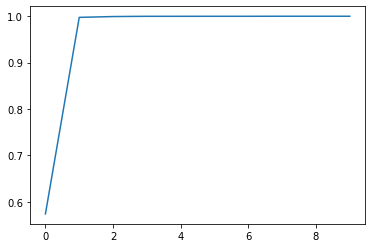

In [71]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(acc)
plt.show()